# Productos internos
## Explicacion Matematica

Sigo XIX Grassmann y otros formalizan el algebra vectorial y el producto interno como una herramienta par extender la geometria euclidiana a espacios de mas dimensiones. En particular de extender el calculo de angulos y normas

Un **producto interno** en un espacio vectorial $V$ sobre $R$ o $C$ es una funcion

$$
\langle *,* \rangle : V 
$$

Que cumple las siguientes propiedades para todos $u,v,w \in V$ y todo escalar $a \in R$ o $C$:

1- Linealidad en el primer argumento (o sesquilinealidad en complejos):

$$
\langle au + bw, v \rangle = a \langle u, v \rangle , b \langle w,v \rangle
$$

2- Simetria (en reales) o conjugada (en complejos):

$$
\langle u,b \rangle = \overline{\langle v, u \rangle}
$$

3- Positividad definida:

$$
\langle u,u \rangle \ge 0
$$

$$
\langle u,u \rangle \iff u = 0
$$

### Uso exacto

El proposito de la definicion de los productos internos es poder realizar un analisis de espacios de dimensiones mas grandes, extrapolando las herramientas que ya se tienen en cuanto a longitud, definición de angulos y proyecciones. Como lo son

#### Normas

$$
\| u \| = \sqrt{\langle u,u \rangle}
$$

#### Angulos

$$
cos(\theta) = \frac{\langle u,v \rangle}{\| u \| \| v \|}
$$

#### Proyecciones

$$
proj_v u = \frac{\langle u,v \rangle}{\langle v,u \rangle}
$$

#### Ortogonalidad

$$
\langle u,v \rangle = 0 \implies u \perp v
$$



# Ejemplo practico: Cálculo de Similitud (Cosine Similarity)

### Contexto
En muchos problemas de ciencias de datos, necesitamos medir **qué tan parecidos son dos objetos** representados como vectores. Por ejemplo:
- Comparar dos documentos en análisis de texto (NLP).
- Comparar dos usuarios en un sistema de recomendación.
- Comparar perfiles de clientes en segmentación.

La **similaridad coseno** mide el ángulo entre dos vectores en un espacio de características. Se calcula directamente con el producto interno:
$$
\cos(\theta) = \frac{\langle u, v \rangle}{\|u\| \|v\|}
$$



### Interpretación
- $\cos(\theta) = 1$  vectores idénticos (máxima similitud).
- $\cos(\theta) = 0$  vectores ortogonales (sin relación).
- $\cos(\theta) = -1$  vectores opuestos (máxima disimilitud).


### Ejemplo
Supongamos que tienes dos vectores que representan perfiles de usuario:

$$
u = (1, 2, 3), \quad v = (3, 2, 1)
$$

Producto interno:
$$
\langle u, v \rangle = 1 \cdot 3 + 2 \cdot 2 + 3 \cdot 1 = 10
$$

Norma de $$u$$:
$$
\|u\| = \sqrt{1^2 + 2^2 + 3^2} = \sqrt{14}
$$

Norma de $$v$$:
$$
\|v\| = \sqrt{3^2 + 2^2 + 1^2} = \sqrt{14}
$$

Similaridad coseno:
$$
\cos(\theta) = \frac{10}{\sqrt{14} \cdot \sqrt{14}} = \frac{10}{14} \approx 0.714
$$

Esto indica que los vectores son bastante similares.


# Ejemplo practico:  Kernel Trick (en SVM y Kernel PCA)

### Contexto
En problemas de clasificación o reducción de dimensionalidad, a veces los datos no se pueden separar o analizar bien en el espacio original. Una solución es **mapearlos a un espacio de mayor dimensión** donde sí sean separables. Sin embargo, calcular explícitamente esa transformación puede ser costoso.

### La idea clave
Con el **kernel trick**, no calculamos la transformación completa. En vez de eso, definimos un **producto interno modificado** que trabaja directamente en el espacio transformado:
$$
K(x, y) = \langle \phi(x), \phi(y) \rangle
$$
Aquí, $$\phi$$ es la función que transforma los datos, pero nunca necesitamos calcular $$\phi(x)$$ directamente. Solo definimos el kernel $$K$$ de forma que actúe como ese producto interno.

---

### Ejemplos de kernels comunes
- **Lineal (espacio original):**
$$
K(x, y) = x^T y
$$

- **Polinomial de grado $$d$$:**
$$
K(x, y) = (x^T y + c)^d
$$

- **RBF (Radial Basis Function):**
$$
K(x, y) = \exp\left(-\gamma \|x - y\|^2\right)
$$

---

### Por qué funciona
En modelos como SVM o Kernel PCA, los cálculos clave dependen solo de productos internos entre puntos de datos. Si reemplazamos esos productos internos por un kernel, el algoritmo trabaja como si estuviera en un espacio transformado, sin calcular la transformación real.

---

### Ejemplo
Supongamos que tienes dos puntos en $$\mathbb{R}^2$$:
$$
x = (1, 2), \quad y = (3, 4)
$$

Si usamos el kernel polinomial de grado 2:
$$
K(x, y) = (x^T y + 1)^2
$$

Producto interno:
$$
x^T y = 1 \cdot 3 + 2 \cdot 4 = 11
$$

Aplicamos el kernel:
$$
K(x, y) = (11 + 1)^2 = 144
$$

Con esto, el algoritmo está operando como si estuviera en un espacio curvado de mayor dimensión, pero sin calcular directamente esas coordenadas.

# Codigo

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_circles
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler



# Función para graficar frontera de decisión
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(title)
    plt.show()

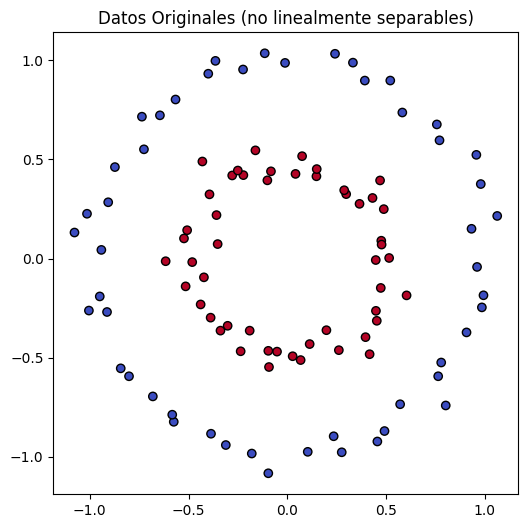

In [2]:
# Crear datos no linealmente separables (círculos concéntricos)
X, y = make_circles(n_samples=100, noise=0.05, factor=0.5, random_state=42)

# Visualizar los datos
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title('Datos Originales (no linealmente separables)')
plt.show()

In [3]:
# Entrenar SVM sin kernel (lineal)
svm_lineal = make_pipeline(StandardScaler(), SVC(kernel='linear'))
svm_lineal.fit(X, y)

# Entrenar SVM con kernel RBF (espacio curvado)
svm_rbf = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma='auto'))
svm_rbf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

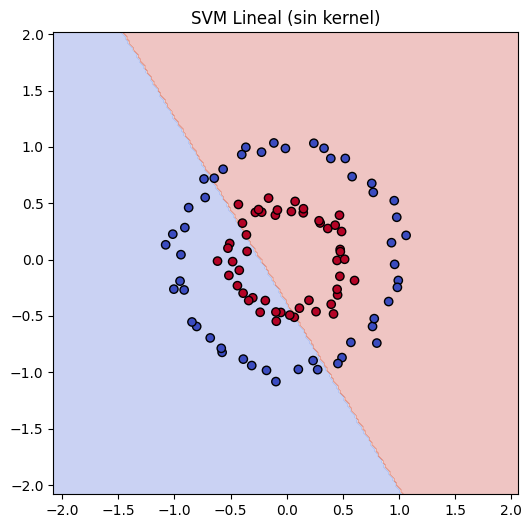

In [6]:
# Mostrar frontera de decisión lineal
plot_decision_boundary(svm_lineal, X, y, 'SVM Lineal (sin kernel)')

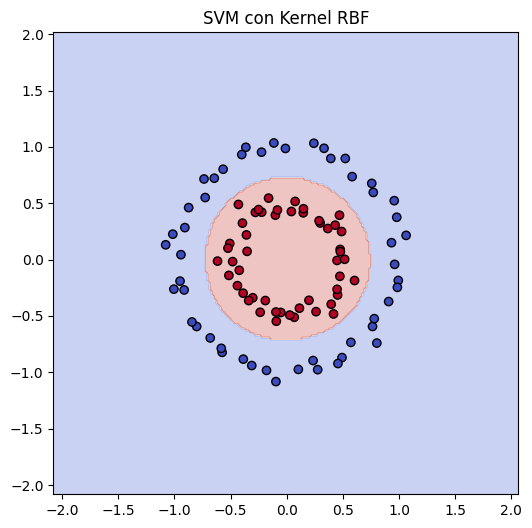

In [7]:
# Mostrar frontera de decisión con kernel RBF
plot_decision_boundary(svm_rbf, X, y, 'SVM con Kernel RBF')

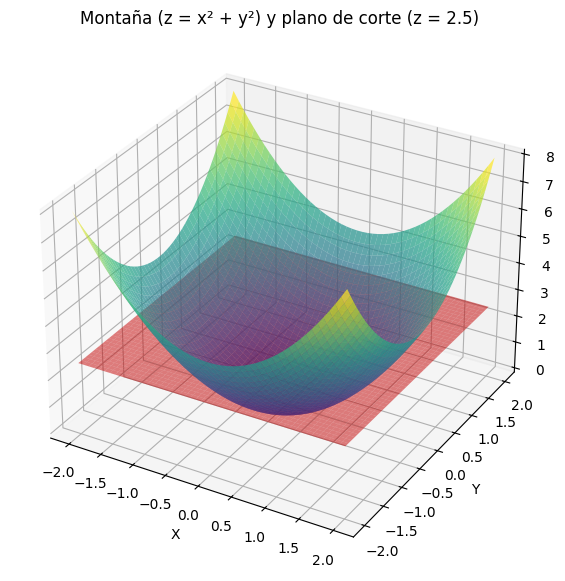

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear una cuadrícula de puntos en 2D (x, y)
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)

# Definir la montaña: z = x² + y²
Z = X**2 + Y**2

# Crear la figura 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Graficar la montaña
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

# Definir un plano horizontal de corte (z = 2.5)
Z_plane = np.full_like(Z, 2.5)

# Graficar el plano de corte
ax.plot_surface(X, Y, Z_plane, color='red', alpha=0.5)

# Etiquetas y título
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z = x² + y²')
ax.set_title('Montaña (z = x² + y²) y plano de corte (z = 2.5)')

# Mostrar la gráfica
plt.show()


# Enlaces

https://mathworld.wolfram.com/InnerProduct.html

https://www.britannica.com/science/inner-product

https://mathshistory.st-andrews.ac.uk/Biographies/Grassmann/

https://machinelearningmastery.com/support-vector-machines-for-machine-learning/

https://scikit-learn.org/stable/modules/svm.html